# **INCOME PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("/Income data.xls")
data

,nan,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


##**BASIC DATA EXPLORATION**

**creating two entities**

In [ ]:
X = data.drop(columns=['Income'])
y = data['Income']

In [ ]:
print(X)

       nan          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [ ]:
print(y)

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 32561, dtype: object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nan             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.head()

,nan,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.dtypes

nan                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [ ]:
data.columns

Index(['nan', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

**givin nan apprpriate coumn name [age]**

In [ ]:

data.rename(columns={'nan': 'age'}, inplace=True)


In [ ]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## **DATA CLEANING AND PREPROCESSING**

**HANDLING MISSING VALUES AND NULLS**

**here numeric column filled by mean and categorical column filled by mode most frequent value**



In [ ]:

from sklearn.impute import SimpleImputer

NC = X.select_dtypes(include=['float64', 'int64']).columns
CC = X.select_dtypes(include=['object']).columns

NI = SimpleImputer(strategy='mean')
X[NC] = NI.fit_transform(X[NC])

CI = SimpleImputer(strategy='most_frequent')
X[CC] = CI.fit_transform(X[CC])

X[CC] = X[CC].replace(' ?', X[CC].mode().iloc[0])

print(X)






        nan          workclass    fnlwgt    education  education-num  \
0      39.0          State-gov   77516.0    Bachelors           13.0   
1      50.0   Self-emp-not-inc   83311.0    Bachelors           13.0   
2      38.0            Private  215646.0      HS-grad            9.0   
3      53.0            Private  234721.0         11th            7.0   
4      28.0            Private  338409.0    Bachelors           13.0   
...     ...                ...       ...          ...            ...   
32556  27.0            Private  257302.0   Assoc-acdm           12.0   
32557  40.0            Private  154374.0      HS-grad            9.0   
32558  58.0            Private  151910.0      HS-grad            9.0   
32559  22.0            Private  201490.0      HS-grad            9.0   
32560  52.0       Self-emp-inc  287927.0      HS-grad            9.0   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-famil

In [ ]:
print(X['occupation'].unique())
print(X['native-country'].unique())
print(X['workclass'].unique())


[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']


**handle null values**

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

**Drop unnecessary columns and duplicates**

In [ ]:
"""data.drop(['fnlwgt'],axis=1,inplace=True)

In [ ]:
duplicates = data[data.duplicated(subset=None, keep=False)]


In [ ]:
num_duplicates = len(duplicates)
num_duplicates

47

In [ ]:
data_no_duplicates = data.drop_duplicates(subset=None, keep='first')

In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


###PERFORMING EDA

### **univariate**

### **Distribution of numeric features**

<Figure size 1200x800 with 0 Axes>

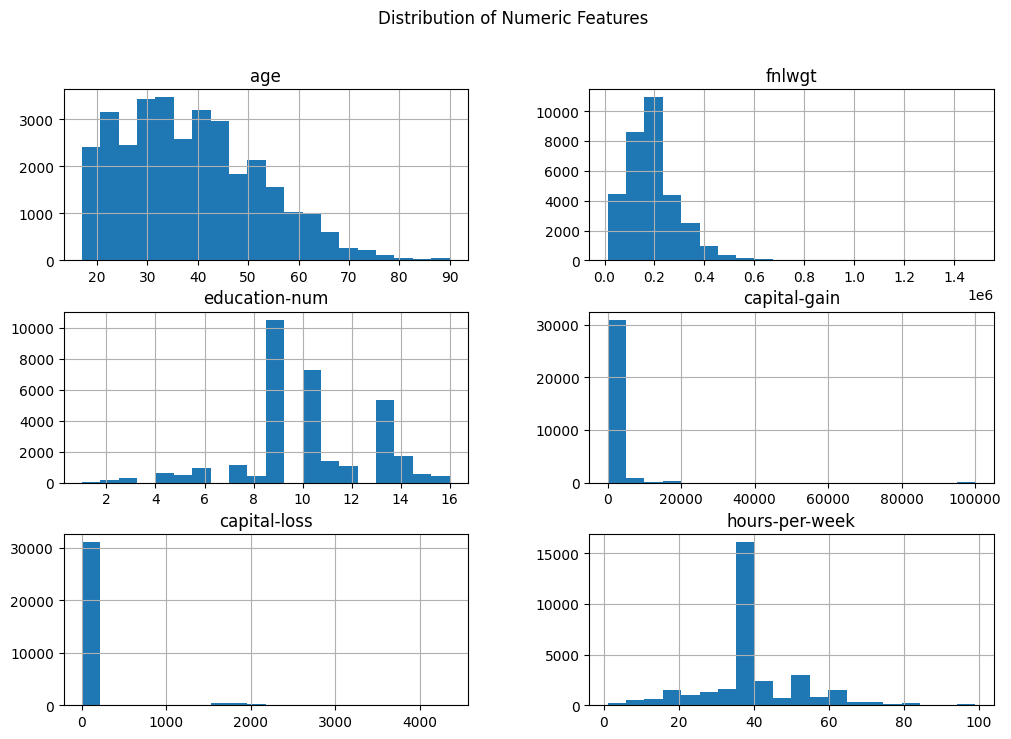

In [ ]:

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
data[numeric_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numeric Features')
plt.show()


*  By observation age attribute is right-skewed and not symetric. min and max age in btw 70 to 90
* it is also seems to like rightly skewed
* capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k)

*   It is also similar to captain-gain
*   that hours per week is seems like slightly normally distrubuted with max count for work hourk between 35-40 with count around 15000 There are also few people who works 60-75 hours per week and some less than 20 and 10 which is unusual.








##3workclass distribution

<ipython-input-25-72d5a7e18841>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='workclass', data=data, order=data['workclass'].value_counts().index, palette='viridis')


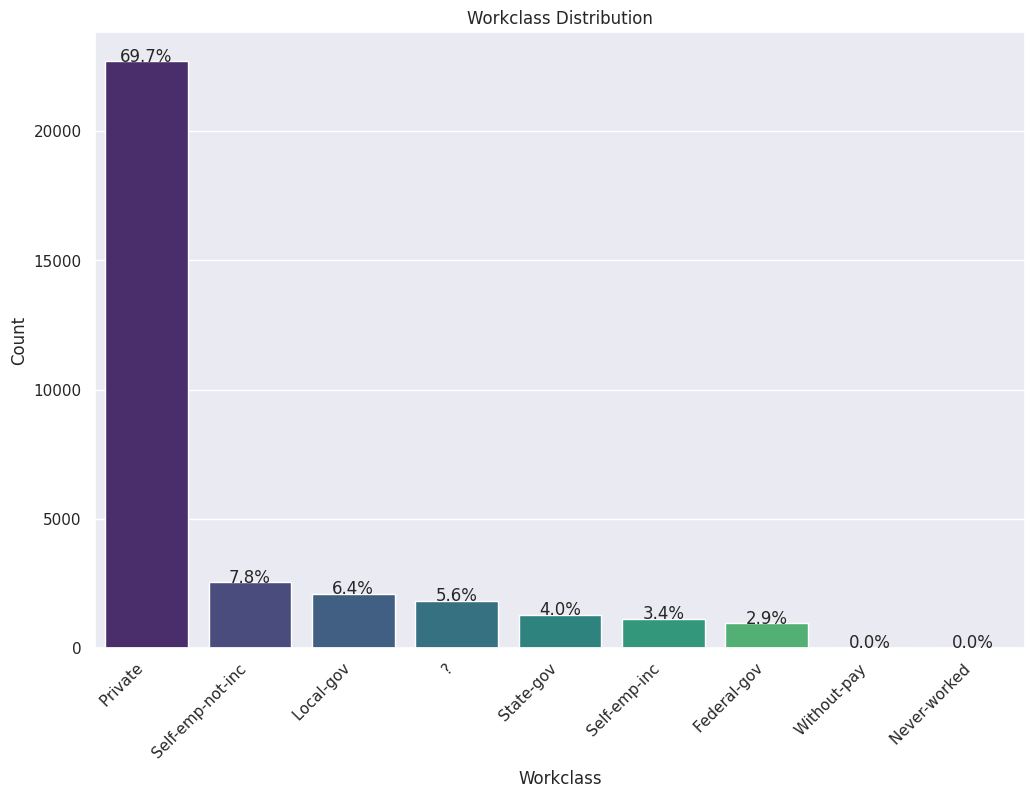

In [ ]:

sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='workclass', data=data, order=data['workclass'].value_counts().index, palette='viridis')
plt.title('Workclass Distribution')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

total = len(data['workclass'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.02
    ax.annotate(percentage, (x, y), ha='center')

plt.show()




*   Most of them are form private workclass with around 69.7% and rest all have less contribution compare to private with without-pay as least count of around 0.00% of total count




###Education distribution

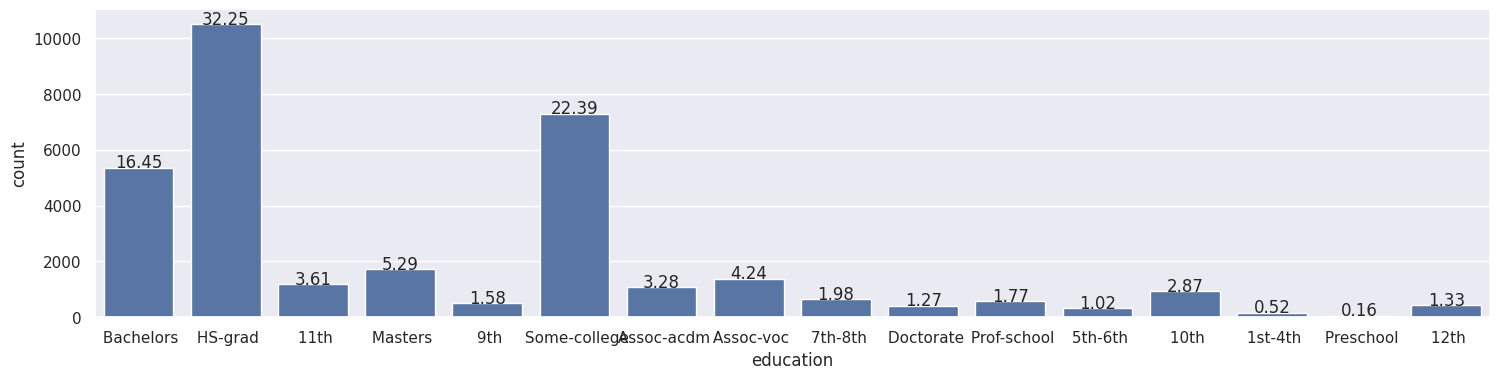

In [ ]:
plt.figure(figsize=(18,4))

a= float(len(['income']))

a= sns.countplot(x='education',data=data)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')



*   HS-grad has highest no of adults and pre-school have lowest.




### martial satus distribution

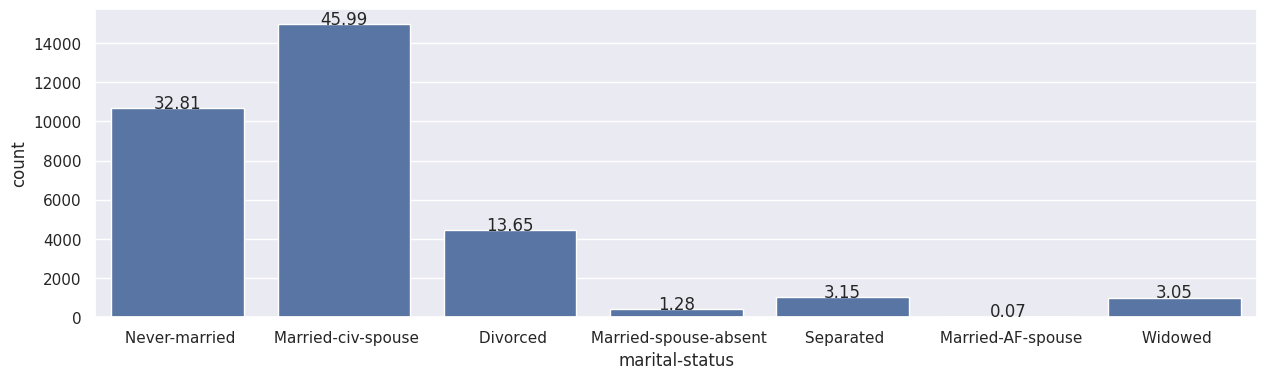

In [ ]:
plt.figure(figsize=(15,4))
total = float(len(data) )
a = sns.countplot(x="marital-status", data=data)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,
            height + 3,'{:1.2f}'.format((height/total)*100),ha="center")



*   Married-civ-spouse has maximum number of samples. Married-AF-spouse has minimum number of obs.



###occupation distribution

<ipython-input-28-bcd9abe2ddda>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(a.get_xticklabels(), rotation=60)


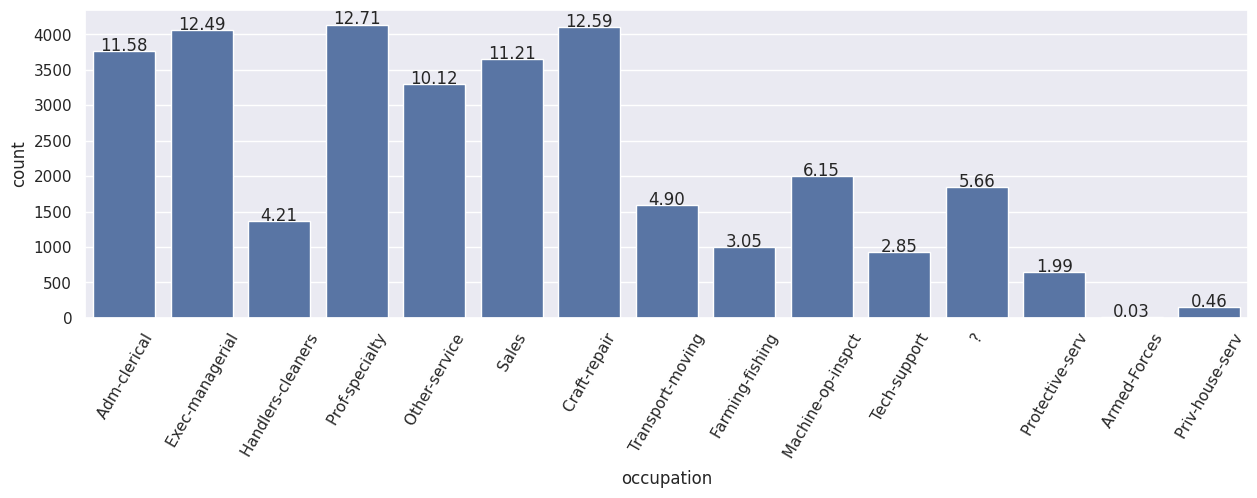

In [ ]:
plt.figure(figsize=(15,4))
total = float(len(data) )
a = sns.countplot(x="occupation", data=data)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")
a.set_xticklabels(a.get_xticklabels(), rotation=60)
plt.show()



*   prof.speciality has the maximum count. Armed-Forces has minimum samples in the occupation attribute.



###relationship distribution

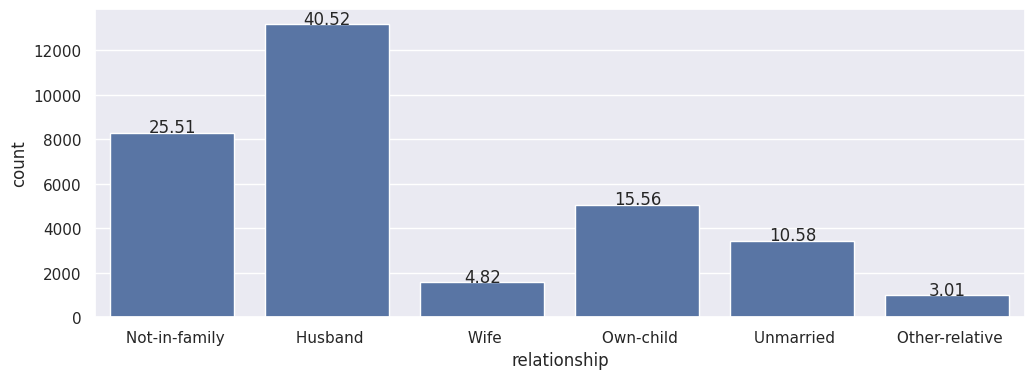

In [ ]:
plt.figure(figsize=(12,4))
total = float(len(data) )
a = sns.countplot(x="relationship", data=data)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")

###INCOME(target variable)

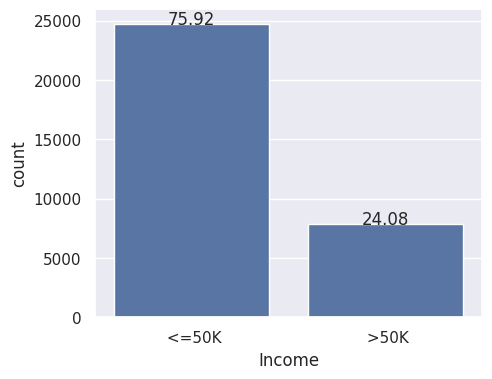

In [ ]:
plt.figure(figsize=(5,4))
total = float(len(data) )
a = sns.countplot(x="Income", data=data)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")





*   In income there is 2 group,group1(who earns more than 50k) 24.08% belong to income and group2(who earns less than 50k) 75.92% belong to income



##BIVARIATE
**AGE/INCOME**

Text(0.5, 1.0, 'Box plot of INCOME and AGE')

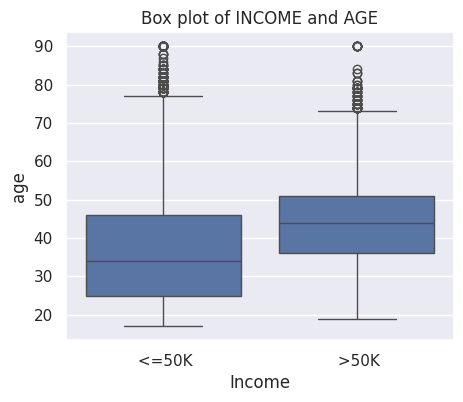

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x='Income',y='age',data=data).set_title('Box plot of INCOME and AGE')



*  we can observe that the median age for people earning more than 50k is significantly greater than the median of people earning less than 50k. So, older people are more likely to earn more than $50k a year as compared to their younger counterparts



**relationship/income**

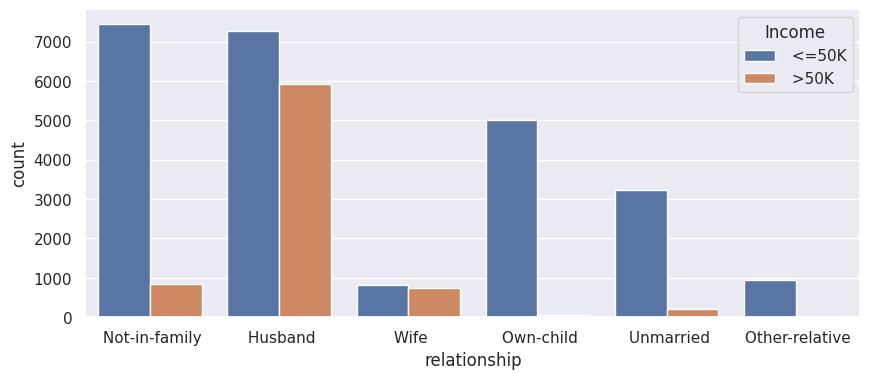

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="relationship", hue="Income",data=data);




*  Mostly a person with relation as husband in a family has most count of people with more then 50k income



**genders/income**

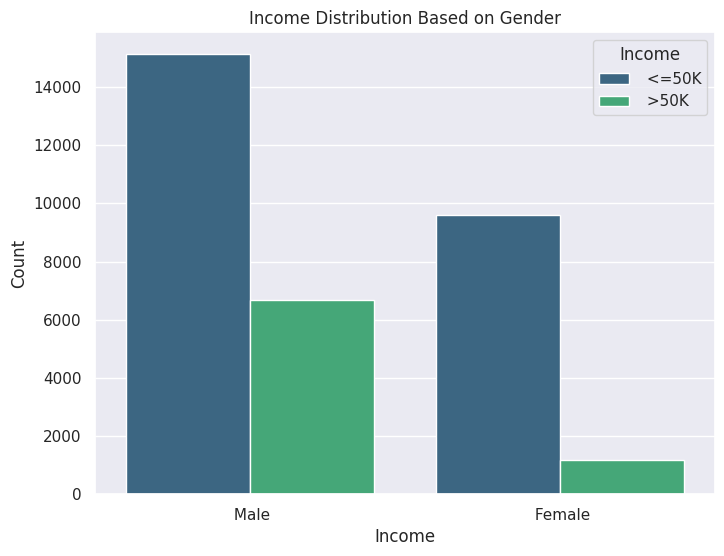

In [ ]:

sns.set_theme(style="darkgrid", palette='viridis')

plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='Income', data=data, palette='viridis')
plt.title('Income Distribution Based on Gender')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()




*   female category is less when compared to male





## data preprocessing

## checking outliers
**finding columns with potential outliers**

In [ ]:
def identify_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

outliers_age = identify_outliers(data['age'])
outliers_fnlwgt = identify_outliers(data['fnlwgt'])
outliers_education_num = identify_outliers(data['education-num'])
outliers_capital_gain = identify_outliers(data['capital-gain'])
outliers_capital_loss = identify_outliers(data['capital-loss'])
outliers_hours_per_week = identify_outliers(data['hours-per-week'])

print("Potential outliers in 'age':", outliers_age.sum())
print("Potential outliers in 'fnlwgt':", outliers_fnlwgt.sum())
print("Potential outliers in 'education-num':", outliers_education_num.sum())
print("Potential outliers in 'capital-gain':", outliers_capital_gain.sum())
print("Potential outliers in 'capital-loss':", outliers_capital_loss.sum())
print("Potential outliers in 'hours-per-week':", outliers_hours_per_week.sum())


Potential outliers in 'age': 143
Potential outliers in 'fnlwgt': 992
Potential outliers in 'education-num': 1198
Potential outliers in 'capital-gain': 2712
Potential outliers in 'capital-loss': 1519
Potential outliers in 'hours-per-week': 9008


In [ ]:


numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

data[numeric_columns] = np.log1p(data[numeric_columns])


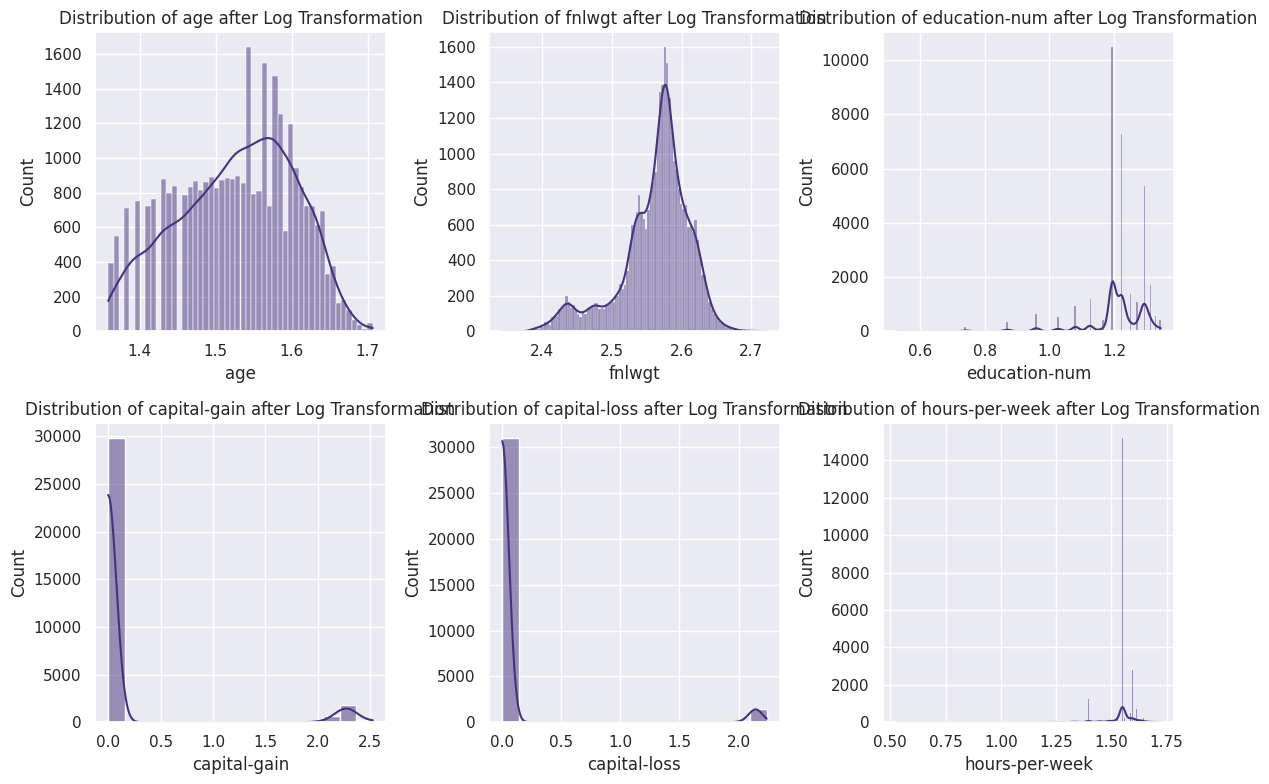

In [ ]:
"""

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
for column in numeric_columns:
    plt.subplot(2, 3, numeric_columns.get_loc(column) + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column} after Log Transformation')

plt.tight_layout()
plt.show()"""


**categorical encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,1.545194,7,2.506199,9,1.291725,4,1,1,4,1,2.161573,0.0,1.550446,39,0
1,1.595709,6,2.512064,9,1.291725,2,4,0,4,1,0.000000,0.0,1.291725,39,0
2,1.539779,4,2.586364,11,1.194706,0,6,1,4,1,0.000000,0.0,1.550446,39,0
3,1.607232,4,2.592726,1,1.124748,2,6,0,2,1,0.000000,0.0,1.550446,39,0
4,1.474144,4,2.619730,9,1.291725,2,10,5,2,0,0.000000,0.0,1.550446,5,0


### **standardizing the dataframe**

In [58]:
X = data.drop('Income', axis = 1)
y = data['Income']

X = StandardScaler().fit_transform(X)
X.shape

(32561, 14)

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,1.545194,7,2.506199,9,1.291725,4,1,1,4,1,2.161573,0.0,1.550446,39,0
1,1.595709,6,2.512064,9,1.291725,2,4,0,4,1,0.000000,0.0,1.291725,39,0
2,1.539779,4,2.586364,11,1.194706,0,6,1,4,1,0.000000,0.0,1.550446,39,0
3,1.607232,4,2.592726,1,1.124748,2,6,0,2,1,0.000000,0.0,1.550446,39,0
4,1.474144,4,2.619730,9,1.291725,2,10,5,2,0,0.000000,0.0,1.550446,5,0


## Building model and evaluation

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=43)


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [68]:
modelLG = LogisticRegression()
modelLG.fit(x_train, y_train)
y_predict = modelLG.predict(x_test)
print('Accuracy=',accuracy_score(y_test, y_predict))

Accuracy= 0.8185168125287886


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4963
           1       0.69      0.44      0.53      1550

    accuracy                           0.82      6513
   macro avg       0.76      0.69      0.71      6513
weighted avg       0.81      0.82      0.80      6513



In [71]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [74]:
y_pred = model.predict(x_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4963
           1       0.76      0.63      0.69      1550

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513

Confusion Matrix:
[[4654  309]
 [ 580  970]]


In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_


In [79]:
final_y_pred = best_model.predict(x_test)
final_accuracy = accuracy_score(y_test, final_y_pred)
print(f"Final Model Accuracy: {final_accuracy:.2f}")


Final Model Accuracy: 0.87
